In [1]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
})


FONTSIZE=14
SMALLER_FONTSIZE=12


def compute_alpha(x, d, offset):
    density_delta = np.exp(x + offset + np.log(d))
    return 1. - np.exp(-density_delta)


def compute_alpha_grad(x, d, offset):
    density_delta = np.exp(x + offset + np.log(d))
    return np.exp(-density_delta) * density_delta


def compute_alpha_grad_two(x, d, offset):
    density_delta = np.exp(x + offset + np.log(d))
    return compute_alpha_grad(x, d, offset) * (1 - density_delta)


def compute_x_from_alpha(alpha, d, offset):
    transmittance = 1. - alpha
    return np.log(np.log(1 / transmittance)) - np.log(d) - offset


def compute_x_from_alpha_grad_two(grad, d, offset):
    if grad == 0:
        return np.log(1 / d) - offset
    raise NotImplementedError


def compute_width_x_from_alphas(d, offset, alphas=(0.01, 0.99)):
    low_alpha = compute_x_from_alpha(alphas[0], d, offset)
    high_alpha = compute_x_from_alpha(alphas[1], d, offset)
    return high_alpha - low_alpha


def generate_sample_plot(x, d, offset, gamma):
    _, ax = plt.subplots()

    alphas = compute_alpha(gamma * x, d, offset)
    grads = compute_alpha_grad(gamma * x, d, offset)
    grads_two = compute_alpha_grad_two(gamma * x, d, offset)
    ax.plot(x, alphas)
    ax.plot(x, grads)
    ax.plot(x, grads_two)

    # draw the width
    low_alpha = compute_x_from_alpha(0.01, d, offset) / gamma
    high_alpha = compute_x_from_alpha(0.99, d, offset) / gamma
    ax.axvline(low_alpha, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(high_alpha, color='black', linestyle='--', linewidth=0.5)

    ax.set_title(r"$\alpha = 1 - \exp(-\exp(\gamma x + \mathrm{offset} + \log(d)))$", fontsize=FONTSIZE, usetex=True)
    ax.set_xlabel(r"$x$", fontsize=FONTSIZE, usetex=True)
    ax.set_ylabel(r"$\alpha$", fontsize=FONTSIZE, usetex=True)
    ax.tick_params(labelsize=SMALLER_FONTSIZE)
    ax.legend([r"$\alpha(x)$", r"$\nabla_x \alpha$", r"$\nabla_x^2 \alpha$"], fontsize=SMALLER_FONTSIZE)
    plt.show()


interval d: 0.0118 * 1 = 0.0118; offset: -5.9864; gamma: 3.0000


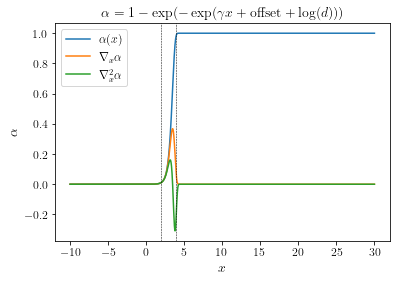

x|(alpha = 0.5) = 3.3532
x|(d(alpha^2)/d^2x = 0) = 3.4754
dx|(alpha=0.01 to alpha=0.99) = 2.0424


In [29]:
# define and print hyperparameter values
x = np.linspace(-10, 30, 10001)
d = 0.0118
k = 1
gamma = 3
L = 4.0
T = 0.99
offset = (
    np.log(np.log(1 / T)) - np.log(L * k)
)
print(f"interval d: {d:.4f} * {k} = {d*k:.4f}; " +
      f"offset: {offset:.4f}; " +
      f"gamma: {gamma:.4f}")

# generate vol rend plot with alpha, alpha grad, and alpha grad^2
generate_sample_plot(x, d * k, offset, gamma)

# find x for alpha = 0.5
midpoint = compute_x_from_alpha(0.5, d * k, offset) / gamma
print(f"x|(alpha = 0.5) = {midpoint:.4f}")

# find x where second derivative is zero
highest_growth = compute_x_from_alpha_grad_two(0, d * k, offset) / gamma
print(f"x|(d(alpha^2)/d^2x = 0) = {highest_growth:.4f}")

# find width of x where alpha ranges from 0.01 to 0.99
width = compute_width_x_from_alphas(d * k, offset) / gamma
print(f"dx|(alpha=0.01 to alpha=0.99) = {width:.4f}")